# Decision Tree Classification Intuition

**CART - the term stands for Classification and regression trees.** This is an umbrella term that encompasses two types of decision trees. they are classification trees and regression trees. Also, regression tress are bit more complex than decision trees.

The concept is very similar to decision tree regression where as the **only change** is decison tree regressions are used to **predict the continous values such as the salary of a person, temperature of a particular location, height of a person etc..** But the decision tree classification is used to **predict the categorical values such as answering yes or no question like male or female, apples or oranges, salary being provided is correct or not etc.. They helps to classify the data.**

So, here below in diagram we have got lots of point mixed with red and green on our scatter plot. Now how does a decision tree work.

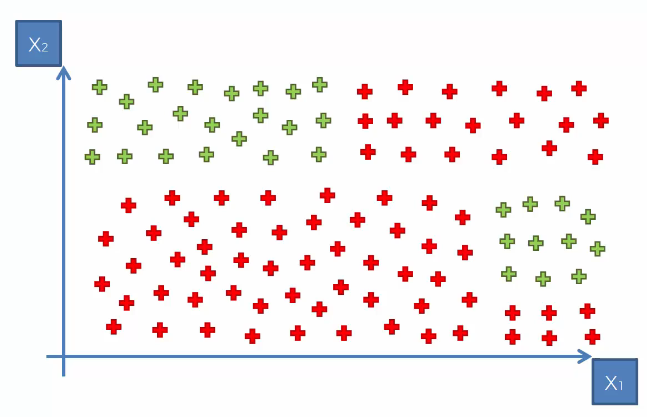

Yes. It cuts the data into several parts or splits the data and apply the decisions based on the value smaller or greater.
The
    
   **first split happening on X2 on the value 60**
   
   **second split on X1 with value 50**
   
   **third split on X1 with value 70 but X1<60**
   
   **fourth split on X2 approximately at 20 but X1>70. We have these leaves and the final ones are called terminal leaves.**
   
   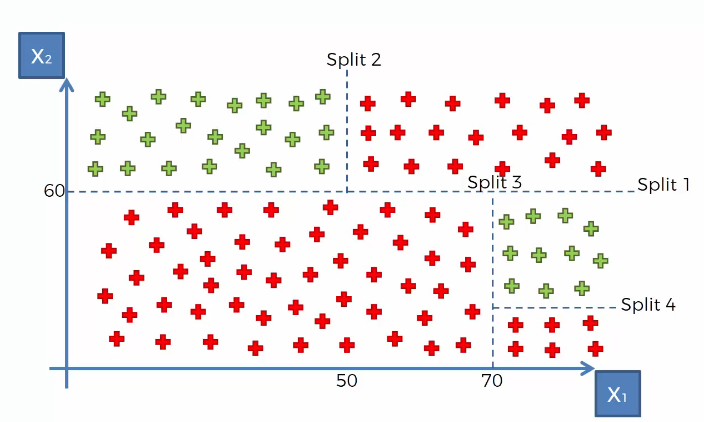
   
   Now the actual decision tree is being constructed.
   
   It will check whether **X2<60**.
   
   Then on **X1<50**
   
   Then on **X1<70**
   
   Then on **X2<20**
   
   Then the terminal leaves will predict what color or what class is? The below diagram **with empty red and green boxes are called terminal leaves. The others are called just leaves.**
   
   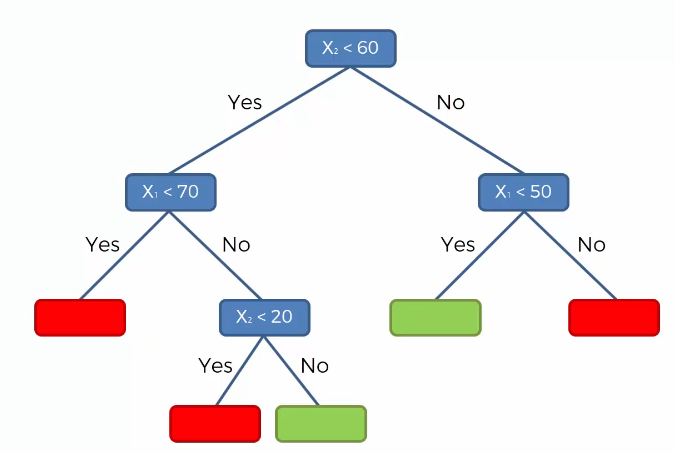
   
   And the other thing is that it doesn't always to be two variables. It can also be multidimensional with lots of column and we can have questions with mix.
   
   Decision trees are pretty old method. So to say it was about to die. But it was upgraded with additional methods that are built on top of decision trees. They are **random forests, gradient boosting etc..**

# Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt

# Importing dataset

In [ ]:
df = pd.read_csv('/kaggle/input/network-ads/Social_Network_Ads.csv')
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# Taking care of missing values

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')

# Splitting dataset into training set and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Training Decision tree algorithm on dataset

In [ ]:
from sklearn.tree import DecisionTreeClassifier
"""We had imported the DecisionTreeClassifier class from tree module of sklearn library. We use the criterion parameter and the
value of it be entropy. Then as usual the other parameter which is random state to set the seed of the output"""

classifier = DecisionTreeClassifier(criterion='entropy',random_state=99)
classifier.fit(X_train,y_train)

# Predicting a new result

In [ ]:
"""Checking the output of particular array value in 2d format. That is in double pair of square bracket"""
print(classifier.predict([[30,87000]]))

# Predicting the decision tree algorithm on the whole test set

In [ ]:
y_pred = classifier.predict(sc.transform(X_test))
np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

# Visualizing the training set result

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualizing the test set result

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()